In [1]:
#Instalamos biblioteca que necesitaremos más adelante
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=3b95043b77f865449aad00c01e373fc62407f1ff58e8b4eb7a03ae8109c370e6
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [5]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pingouin as pg
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/datasets/Diet.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.head()

,gender,Diet,weight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3


In [4]:
# Drop columns with values in sq miles
df = df.drop(columns=['elevation_ft', 'area_total_sq_mi', 'area_land_sq_mi', 'area_water_sq_mi'])
df.describe()

,Unnamed: 0,latd,longd,elevation_m,population_total,area_total_km2,area_land_km2,area_water_km2,area_water_percent
count,482.000000,482.000000,482.000000,434.000000,4.820000e+02,477.000000,478.000000,478.000000,477.000000
mean,240.500000,36.095088,-119.837714,180.416705,6.489493e+04,46.753283,43.547021,3.125178,5.301801
std,139.285678,2.298006,2.147676,309.531825,2.032041e+05,90.972269,84.933022,11.562269,14.656428
min,0.000000,32.578333,-124.263333,-34.000000,1.000000e+00,0.813000,0.813000,0.000000,0.000000
25%,120.250000,33.977292,-121.954931,22.000000,1.090200e+04,9.551000,9.025000,0.000250,0.000000
50%,240.500000,36.204722,-119.708611,67.000000,2.905750e+04,23.551000,21.533000,0.078500,0.340000
75%,360.750000,37.886667,-117.977292,173.500000,6.646650e+04,51.772000,49.322000,0.623250,1.870000
max,481.000000,41.965000,-114.596389,2402.000000,3.884307e+06,1302.000000,1214.000000,122.270000,84.580000


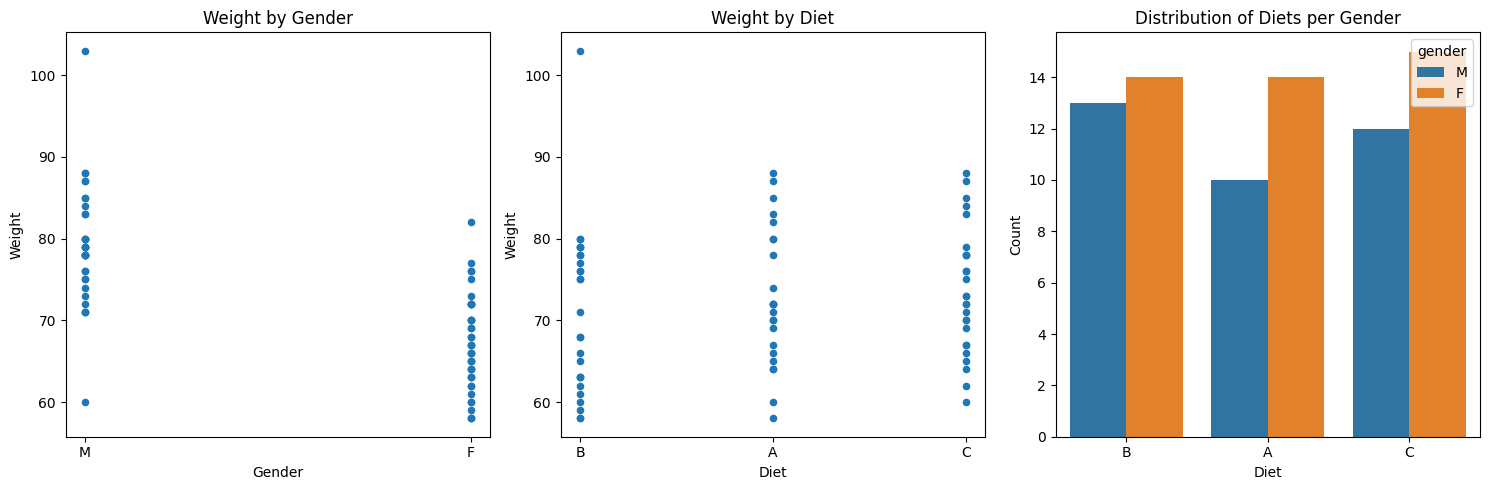

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plots
df.plot(kind='scatter', x='gender', y='weight', ax=axs[0])
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Weight')
axs[0].set_title('Weight by Gender')

df.plot(kind='scatter', x='Diet', y='weight', ax=axs[1])
axs[1].set_xlabel('Diet')
axs[1].set_ylabel('Weight')
axs[1].set_title('Weight by Diet')

# diets per gender distribution
sns.countplot(x='Diet', hue='gender', data=df, ax=axs[2])
axs[2].set_xlabel('Diet')
axs[2].set_ylabel('Count')
axs[2].set_title('Distribution of Diets per Gender')

plt.tight_layout()
plt.show()

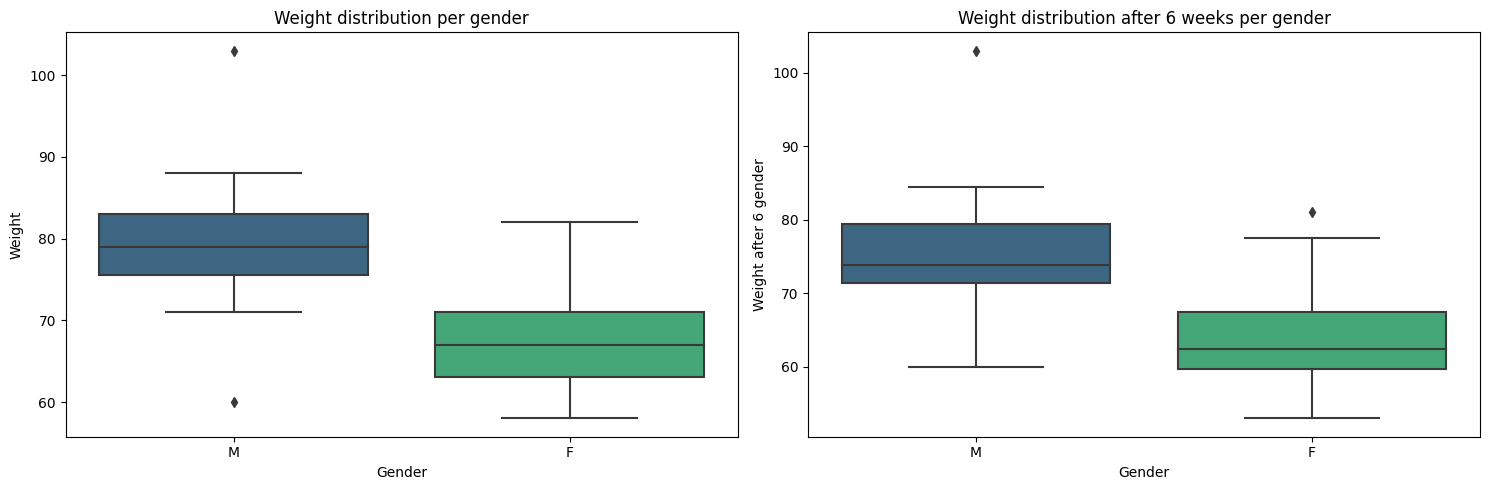

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='gender', y='weight', data=df, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Weight')
axs[0].set_title('Weight distribution per gender')

sns.boxplot(x='gender', y='weight6weeks', data=df, palette='viridis', ax=axs[1])
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Weight after 6 gender')
axs[1].set_title('Weight distribution after 6 weeks per gender')

plt.tight_layout()
plt.show()

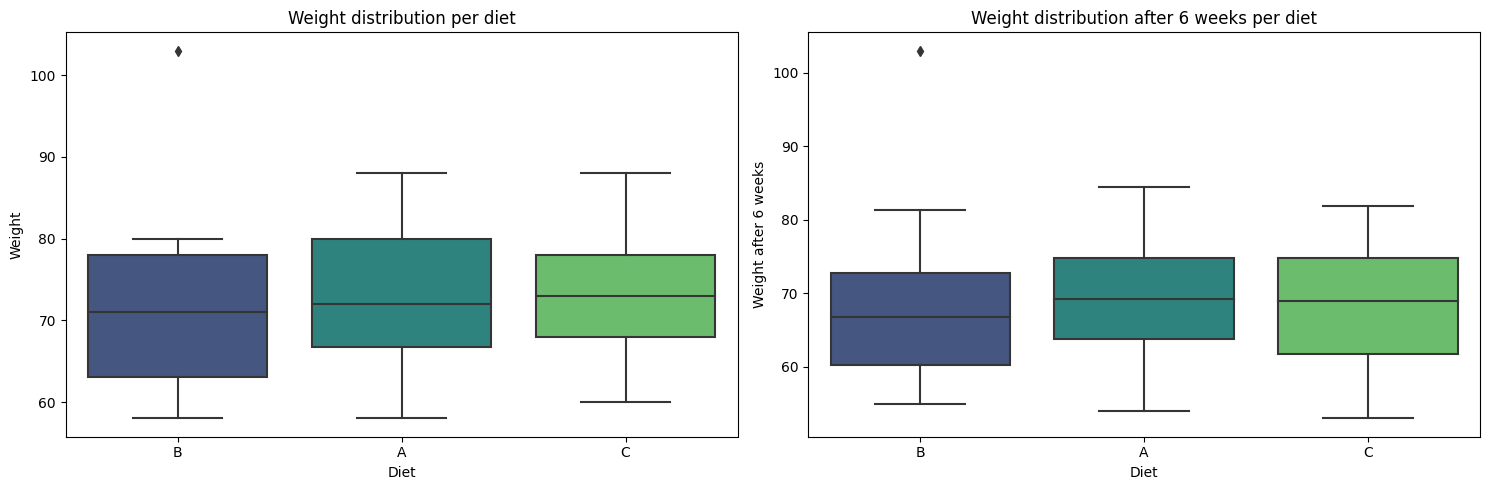

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='Diet', y='weight', data=df, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Diet')
axs[0].set_ylabel('Weight')
axs[0].set_title('Weight distribution per diet')

sns.boxplot(x='Diet', y='weight6weeks', data=df, palette='viridis', ax=axs[1])
axs[1].set_xlabel('Diet')
axs[1].set_ylabel('Weight after 6 weeks')
axs[1].set_title('Weight distribution after 6 weeks per diet')

plt.tight_layout()
plt.show()

## Hipótesis
¿Hay diferencias en el peso de una persona según su dieta asignada?

* H0: las medias de todos los grupos son iguales
* H1: las medias de todos los grupos son diferentes

## Supuestos
 
 * Normalidad
 * Igualdad de varianza
 * Independencia de la muestra
 * La variable de respuesta es continua: Población

In [16]:
#Verificamos normalidad
pg.normality(data=df, dv='weight', group = 'Diet')

,W,pval,normal
gender,,,
M,0.923104,0.017535,False
F,0.975525,0.480795,True


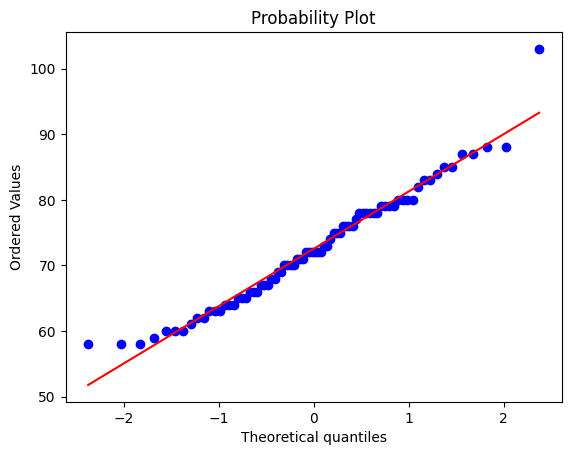

In [17]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(df['weight'], dist="norm", plot=plt)
plt.show()

In [20]:
#Verificamos igualdad de varianzas
pg.homoscedasticity(data=df, dv='weight', group='Diet')

,W,pval,equal_var
levene,0.075437,0.784325,True


In [28]:
#Ejecutar ANOVA - Forma 1

stats.f_oneway(df[df['Diet'] == 'A']['weight'], df[df['Diet'] == 'B']['weight'],df[df['Diet'] == 'C']['weight'])

F_onewayResult(statistic=0.5840587462393533, pvalue=0.5601464006908716)

In [29]:
#Ejecitar ANOVA -  Forma 2
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('weight ~ Diet', data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

               sum_sq    df         F    PR(>F)
Diet        89.860755   2.0  0.584059  0.560146
Residual  5769.587963  75.0       NaN       NaN


## Interpretación de resultados

Del estadístico F, que en nuestro caso es muy bajo (0.58) podemos observar que las medias de los grupos son similares.

Del p_value, que en nuestro caso es mayor al intervalo de confianza (0.05) podemos rechazar la hipótesis nula H0.

Por lo tanto, sí hay diferencias significativas entre los miembros de cada grupo.